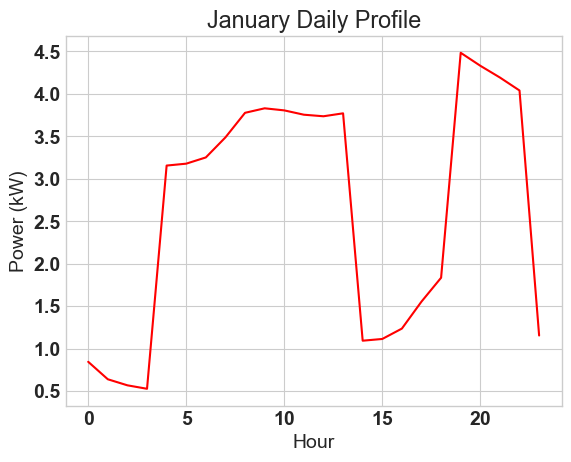

In [1]:
#assignment 1 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pandas as pd
import datetime
import sys
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
#make plots green with transparent background
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['green','blue','red','black','orange','purple','brown','pink','gray','olive','cyan','magenta'])
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['figure.facecolor'] = 'none'
#make font size bold and larger
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14


import os
os.chdir('/Users/2023/Documents/EnergySystems/Assignment1')

offpeak = [1144,1245,1081,756,155,27,0,0,43,216,652,1188] #kwh
#creates a numpy array of the offpeak consumption
offpeak = np.array(offpeak)

standard = [819,468,563,465,379,281,329,329,335,525,399,746] #kwh
#creates a numpy array of the standard consumption
standard = np.array(standard)

dayspermonth = np.array([31,28,31,30,31,30,31,31,30,31,30,31]) #days
season = np.array([1,1,2,2,2,3,3,3,4,4,4,1]) #seasons

standarddaily = standard/dayspermonth #kwh/day
offpeakdaily = offpeak/dayspermonth #kwh/day
offpeakhourly = offpeakdaily/14 #kw
offpeakprofile = np.array([0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,0])
demandprofile = pd.read_csv('demandprofile.csv')

#delete every other row in demand profile
demandprofile = demandprofile.iloc[::2]
#copy the last ow of demand profile to the beginning   
demandprofile = demandprofile.sort_index() 
#reset index of demand profile
demandprofile = demandprofile.reset_index(drop=True)
#demandprofile.loc[1] = demandprofile.iloc[-1]
#print(demandprofile['Aut Wd'])
#print(demandprofile)


#multiplies the load curve for the specific season until the daily kwh is hit, then repeats it for as many days are in the month
#this is done for each season
def powerscale(kwh, season):
    totcon = 0
    scaler = 1
    if season ==1:
        monprof = demandprofile['Wtr Wd'].copy()
    elif season ==2:
        monprof = demandprofile['Spr Wd'].copy()
    elif season ==3:
        monprof = demandprofile['Smr Wd'].copy()
    elif season ==4:
        monprof = demandprofile['Aut Wd'].copy()
    while totcon < kwh:
        monprof = monprof.multiply(scaler)
        totcon = monprof.sum()
        scaler = scaler + .000001
    return monprof
#for loop that iterates over the length of standard daily
#calls the powerscale function for each month and season
#stores the result in a new array
janprofile = powerscale(standarddaily[0], season[0])
febprofile = powerscale(standarddaily[1], season[1])
marprofile = powerscale(standarddaily[2], season[2])
aprprofile = powerscale(standarddaily[3], season[3])
mayprofile = powerscale(standarddaily[4], season[4])
junprofile = powerscale(standarddaily[5], season[5])
julprofile = powerscale(standarddaily[6], season[6])
augprofile = powerscale(standarddaily[7], season[7])
sepprofile = powerscale(standarddaily[8], season[8])
octprofile = powerscale(standarddaily[9], season[9])
novprofile = powerscale(standarddaily[10], season[10])
decprofile = powerscale(standarddaily[11], season[11])

# plt.plot(janprofile[0:24], color='red')
# xlabel = plt.xlabel('Hour')
# ylabel = plt.ylabel('Power (kW)')
# title = plt.title('January Daily Peak Profile')

#make janop a numpy array
janop = np.array((offpeakhourly[0]*offpeakprofile))
febop = np.array(offpeakhourly[1]*offpeakprofile)
marop = np.array(offpeakhourly[2]*offpeakprofile)
apro =  np.array(offpeakhourly[3]*offpeakprofile)
mayop = np.array(offpeakhourly[4]*offpeakprofile)
junop = np.array(offpeakhourly[5]*offpeakprofile)
julop = np.array(offpeakhourly[6]*offpeakprofile)
augop = np.array(offpeakhourly[7]*offpeakprofile)
sepop = np.array(offpeakhourly[8]*offpeakprofile)
octop = np.array(offpeakhourly[9]*offpeakprofile)
novop = np.array(offpeakhourly[10]*offpeakprofile) 
decop = np.array(offpeakhourly[11]*offpeakprofile)
# plt.plot(janop[0:24], color='red')
# xlabel = plt.xlabel('Hour')
# ylabel = plt.ylabel('Power (kW)')
# title = plt.title('January Daily Off-Peak Profile')
#add janop and janprofile together
janprofile = janprofile+janop
febprofile = febprofile+febop
marprofile = marprofile+marop
aprprofile = aprprofile+apro
mayprofile = mayprofile+mayop
junprofile = junprofile+junop
julprofile = julprofile+julop
augprofile = augprofile+augop
sepprofile = sepprofile+sepop
octprofile = octprofile+octop
novprofile = novprofile+novop
decprofile = decprofile+decop

#creates a new dataframe that has the profiles for each month as many times as there are days in that month so that it is as long as there are days in the year
#this is done for each month
janprofile = pd.concat([janprofile]*31, ignore_index=True)
febprofile = pd.concat([febprofile]*28, ignore_index=True)
marprofile = pd.concat([marprofile]*31, ignore_index=True)
aprprofile = pd.concat([aprprofile]*30, ignore_index=True)
mayprofile = pd.concat([mayprofile]*31, ignore_index=True)
junprofile = pd.concat([junprofile]*30, ignore_index=True)
julprofile = pd.concat([julprofile]*31, ignore_index=True)
augprofile = pd.concat([augprofile]*31, ignore_index=True)
sepprofile = pd.concat([sepprofile]*30, ignore_index=True)
octprofile = pd.concat([octprofile]*31, ignore_index=True)
novprofile = pd.concat([novprofile]*30, ignore_index=True)
decprofile = pd.concat([decprofile]*31, ignore_index=True)
plt.plot(janprofile[0:24], color='red')
xlabel = plt.xlabel('Hour')
ylabel = plt.ylabel('Power (kW)')
title = plt.title('January Daily Profile')

#concatenates all the months into one dataframe on top of one another in one column with the indices reset
#this is the final demand profile 

demandprofile = pd.concat([janprofile,febprofile,marprofile,aprprofile,mayprofile,junprofile,julprofile,augprofile,sepprofile,octprofile,novprofile,decprofile], ignore_index=True)
#plot demand profile in red

# #convert hours to datetime with the first hour being 1/1/2022 00:00:00
# demandprofile['Time'] = pd.date_range(start='1/1/2022 00:00:00', periods=8760, freq='H')
# #plot time and demand profile
# plt.plot(demandprofile['Time'], demandprofile[0:8760], color='red')

# xlabel = plt.xlabel('Time')
# ylabel = plt.ylabel('Power (kW)')
# title = plt.title('Annual Demand Profile')


In [2]:

#imports hourly solar data
solarprofile = pd.read_csv('solarprofile.csv')
#imports hourly wind data
windprofile = pd.read_csv('windprofileres.csv') #1 wind turbine
#deletes the time column from the solar and wind data
solarprofile = solarprofile['electricity']*.4
windprofile = windprofile['electricity_histart']/1000
concount = np.array([])
#append to concount


# #counts number of consecutive zeros in wind profile
# for i in windprofile:
#     if i == 0:
#         count = count+1
#     elif count>0:
#         concount = np.append(concount, count)
#         count = 0
#     else:
#         count = 0


# #print(demandprofile.sum())

# #prints minimum value of wind profile
# print(concount)
print(windprofile)

0        1.141910
1        1.029800
2        0.935264
3        1.065554
4        1.117670
5        1.150394
6        1.268034
7        1.367836
8        1.391530
9        1.382196
10       1.334808
11       1.363528
12       1.369990
13       1.412352
14       1.320448
15       1.111004
16       1.037678
17       0.992834
18       1.014650
19       0.984956
20       0.909206
21       0.827840
22       0.722000
23       0.646904
24       0.560934
25       0.594818
26       0.549508
27       0.511290
28       0.465192
29       0.482528
30       0.508926
31       0.522716
32       0.512866
33       0.485286
34       0.365680
35       0.275240
36       0.276600
37       0.259260
38       0.000000
39       0.214014
40       0.256540
41       0.248040
42       0.217570
43       0.000000
44       0.000000
45       0.000000
46       0.000000
47       0.000000
48       0.000000
49       0.000000
50       0.000000
51       0.000000
52       0.000000
53       0.000000
54       0.000000
55       0

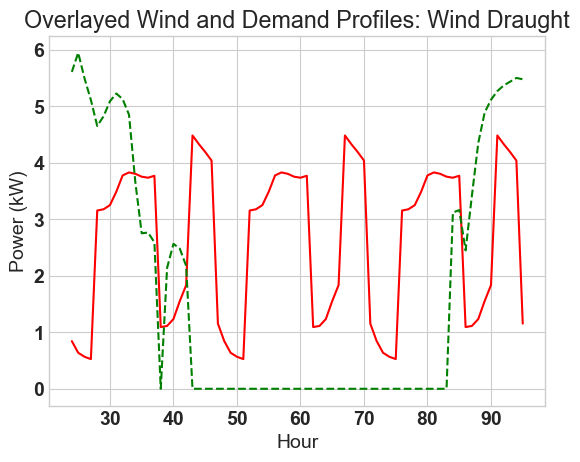

In [3]:
i = 1
plt.plot(demandprofile[0+i*24:24+i*24*3], color='red')
#plot solar profile in green and dotted line
plt.plot(windprofile[0+i*24:24+i*24*3]*10, color='green', linestyle='dashed')
xlabel = plt.xlabel('Hour')
ylabel = plt.ylabel('Power (kW)')
title = plt.title('Overlayed Wind and Demand Profiles: Wind Draught')


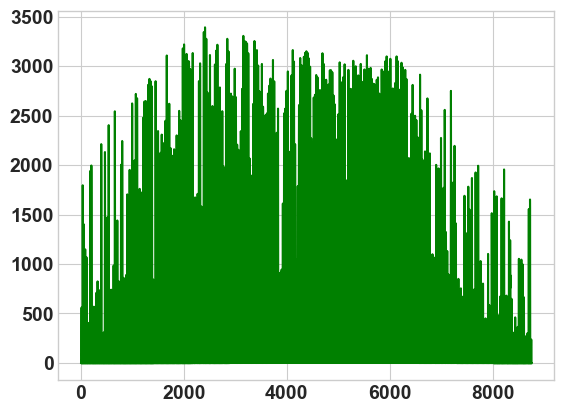

In [4]:
#plot solar supply - demand
solarnumber = 10000
solarsup = solarprofile*solarnumber
solarapp = solarprofile*solarnumber-demandprofile

#print(solarapp)
plt.plot(solarapp)
#the count of negative values in solarapp
solarappneg = solarapp[solarapp < 0].count()
#best case with no batteries still has 4412 hours of unmet need


In [5]:
print(solarappneg)

4412


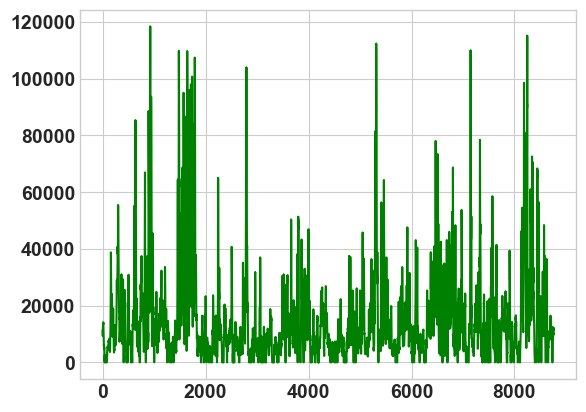

In [6]:
#plot wind supply - demand

windnumber = 10000
windapp = windprofile*windnumber-demandprofile
plt.plot(windapp)
#the count of negative values in windprofile
windappneg = windapp[windapp < 0].count()
# with infinite wind turbines, there are only 9 hours of unmet need

In [7]:
print(windappneg)

839


In [8]:
solarnumber = 500
solarsup = solarprofile*solarnumber
#battery storage
batterycapacity = 100#kwh
charge = batterycapacity
#makes a loop through the solarapp array, when there is extra supply, it charges the battery (up to the capacity), when there is extra demand, it discharges the battery (up to 0)
#stores the result in a new array
solarbattery = []
newcharge = charge
solardischarge = []
for i in solarprofile*solarnumber-demandprofile:
    if i > 0:
        newcharge = newcharge + i
        if newcharge > batterycapacity:
            newcharge = batterycapacity
        solarbattery.append(newcharge)
        solardischarge.append(0)
    else:
        newcharge = newcharge + i
        if newcharge < 0:
            newcharge = 0
        solarbattery.append(newcharge)
        solardischarge.append(charge - newcharge) 
    charge = newcharge
solarbattery = np.array(solarbattery)
solardischarge = np.array(solardischarge)
#makes a discharge array that shows how much of the battery is serving demand at each hour
#makes an array of the battery capacity and subtracts the battery array from it
#this shows how much of the battery is being discharged at each hour


solarsupbatt = solarprofile*solarnumber+solardischarge
solarappbatt = solarprofile*solarnumber+solardischarge-demandprofile

#print(solarapp)
#plt.plot(solarappbatt)
#the count of negative values in solarapp
solarappbattneg = solarappbatt[solarappbatt < -.1].count()
print(solarappbattneg)
#infinite panels and no batteries still has 4412 hours of unmet need
#with infinite panels we need 44 kwh of battery storage to meet all demand
#with 2200 panels we need 44 kwh of battery storage to meet all demand
#with 500 panels we need 100 kwh of battery storage to meet all demand
#with 255 panels and 200 kwh of battery storage we meet all demand
#with 300 panels and 100 kwh of battery storage we have 63 hours of unmet demand




0


In [9]:
print(solarappbattneg) #for infinite sola panels, you would need 4.4 kwh of battery storage to meet all demand

0


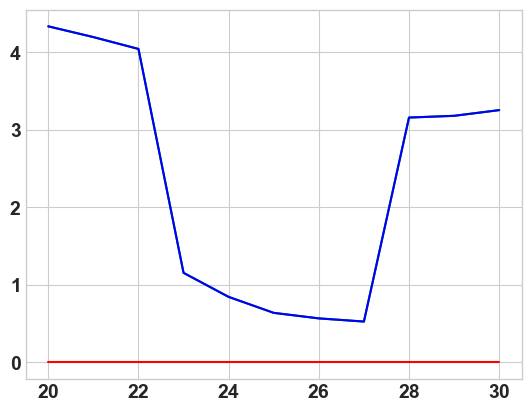

In [10]:
i = 20
plt.plot(solarsupbatt[20:31])
plt.plot(demandprofile[20:31])
plt.plot(solarsup[20:31])

In [18]:
windnumber = 3
#repeatfor windapp
#battery storage
batterycapacity = 0 #kwh
charge = batterycapacity
windbattery = []
winddischarge = []
newcharge = charge
for i in windprofile*windnumber-demandprofile:
    if i > 0:
        newcharge = newcharge + i
        if newcharge > batterycapacity:
            newcharge = batterycapacity
        windbattery.append(newcharge)
        winddischarge.append(0)
    else:
        newcharge = newcharge + i
        if newcharge < 0:
            newcharge = 0
        windbattery.append(newcharge)
        winddischarge.append(charge - newcharge) 
    charge = newcharge
windbattery = np.array(windbattery)
winddischarge = np.array(winddischarge)
#repeat for wind
windsupbatt = windprofile*windnumber+winddischarge
windappbatt = windprofile*windnumber+winddischarge-demandprofile
#plt.plot(windappbatt)
#the count of negative values in windprofile
windappbattneg = windappbatt[windappbatt < -.1]#]\.count()
#for infinite wind turbine with no batteries, there are 9 hours of unmet need (assuming it always spins)
#dropping values less than 3.4 m/s to 0 to be conservative there are 839 hours of unmet need (assuming it never spins below start up speed)
#for infinite turbines we'd need 112.5 kwh of battery storage to meet all demand
# 12 turbines and 112.5 kwh of battery storage can meet all demand
# 3 turbines and 240 kWh of battery storage can meet all demand and provides greater storage
# 14 turbine and 150 kWh of battery storage can meet all demand and provides greater storage
print(windappbattneg.count())

1872


In [12]:
print(windappbatt[windappbatt<-0.1].count())

3826


4      -2.037949
5      -2.027642
6      -1.983368
7      -2.119966
8      -2.385659
9      -2.447980
10     -2.470912
11     -2.391244
12     -2.366440
13     -2.358723
16     -0.197312
17     -0.560074
18     -0.819493
19     -3.499397
20     -3.422302
21     -3.365088
22     -3.318083
23     -0.506568
24     -0.282772
28     -2.690427
29     -2.695508
30     -2.742476
31     -2.965086
32     -3.264323
33     -3.344890
34     -3.440040
35     -3.479532
36     -3.459830
37     -3.511815
38     -1.092334
39     -0.898699
40     -0.978450
41     -1.304868
42     -1.616573
43     -4.484353
44     -4.331508
45     -4.192928
46     -4.040083
47     -1.153472
48     -0.843706
49     -0.637874
50     -0.566546
51     -0.525788
52     -3.155619
53     -3.178036
54     -3.251402
55     -3.487802
56     -3.777189
57     -3.830176
58     -3.805720
59     -3.754772
60     -3.736430
61     -3.771075
62     -1.092334
63     -1.112713
64     -1.234990
65     -1.552908
66     -1.834143
67     -4.4843

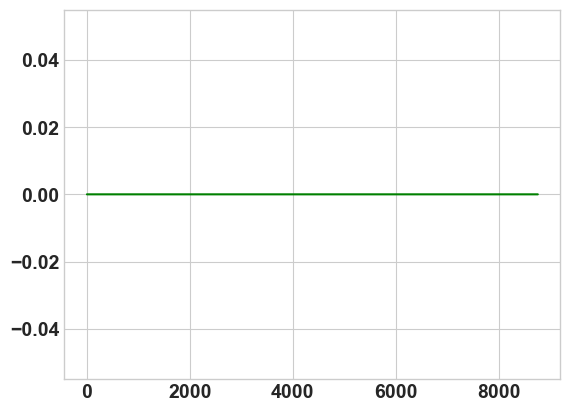

In [13]:
#print(windappbattneg) #for infinite wind turbines, you would need 3.4 kwh of battery storage to meet all demand
windappbattneg = windappbatt[windappbatt < -.1]
print(windappbattneg)
#plt.plot(windprofile[40:85])
plt.plot(windbattery)
#plt.plot(demandprofile[78:85])

Text(0.5, 1.0, 'Wind Speed at 10m in Oxford')

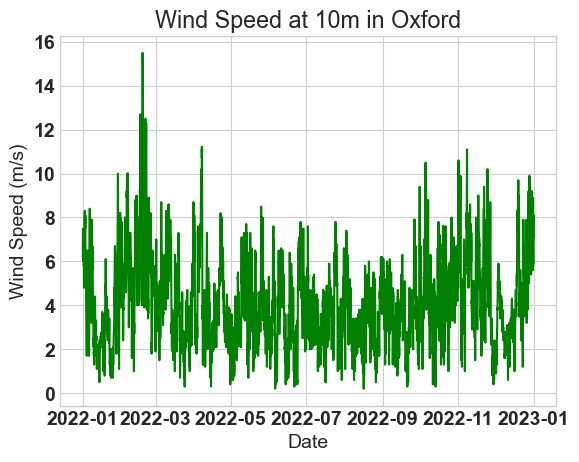

In [14]:
rawdata = pd.read_csv('wind_solar_raw_2007_Values.csv')
#set period end to be datetime
rawdata['period_end'] = pd.to_datetime(rawdata['period_end'])
#divide wind power by 1000
rawdata['wind_power'] = rawdata['wind_power']/1000
#delete columns after 5
#rawdata = rawdata.iloc[:, :5]
rawdata.head()
# #plot the wind speed at 10 m data with seaborn with x axis as time and y axis as wind speed
# sns.lineplot(x='period_end', y='wind_speed_10m', data=rawdata)
# #change y axis label to wind speed at 10 m
# plt.ylabel('Wind speed (m/s)')
# plt.xlabel('Date')
# #add title "Wind speed at 10 m in Oxford"
# plt.title('Wind speed at 10 m in Oxford')
rawdata = rawdata[(rawdata['period_end'] > '2022-01-01') & (rawdata['period_end'] < '2023-01-01')]
#plot the ghi data from 2023 to 2024
sns.lineplot(x='period_end', y='wind_speed_10m', data=rawdata)
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Date')
plt.title('Wind Speed at 10m in Oxford')


KeyError: 'Time'

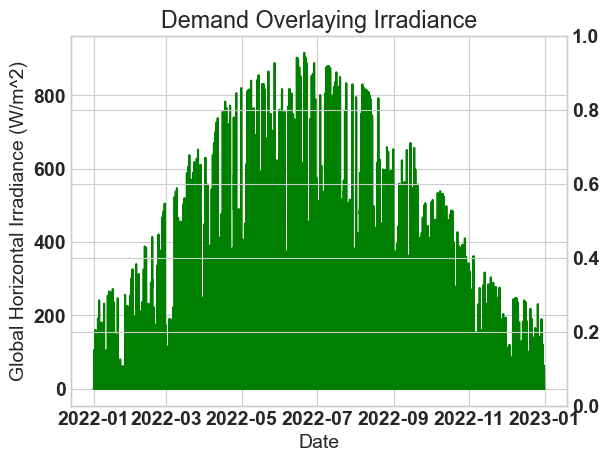

In [15]:
#get just the daat from 2022 to 2023
rawdata = rawdata[(rawdata['period_end'] > '2022-01-01') & (rawdata['period_end'] < '2023-01-01')]
#plot the ghi data from 2023 to 2024
sns.lineplot(x='period_end', y='ghi', data=rawdata)
plt.ylabel('Global Horizontal Irradiance (W/m^2)')
plt.xlabel('Date')
plt.title('Demand Overlaying Irradiance')

#put second plot on right y axis
ax2 = plt.twinx()

plt.plot(demandprofile['Time'], demandprofile[0:8760], color='red')
# make the plot behind the first 
ax2.set_zorder(2)
xlabel = plt.xlabel('Time')
ylabel = plt.ylabel('Power (kW)')
plt.show()

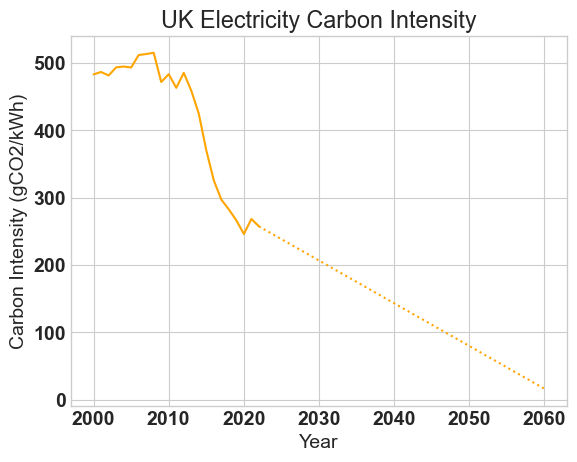

In [ ]:

carbonint = pd.read_csv('cint.csv')
carbonint.head()
#plot carbonint
sns.lineplot(x='Year', y=carbonint['Cint'], data=carbonint[0:23], color = 'orange')
sns.lineplot(x='Year', y=carbonint['Cint'], data=carbonint[22:24], color = 'orange', linestyle = 'dotted')
xlabel = plt.xlabel('Year')
ylabel = plt.ylabel('Carbon Intensity (gCO2/kWh)')
plt.title('UK Electricity Carbon Intensity')
demandprofile = pd.concat([demandprofile]*57, ignore_index=True)

In [ ]:
#make demandprofile repeat 57 times

#mke a linear array from 257 to 16 that is the same length as demand profile
gridcarbonint = np.linspace(257,16,8760*57)
#totalcarbon = gridcarbonint*demandprofile
#totatcarbon = totalcarbon.sum()
#print(totalcarbon.sum()) #94.8 tonnes of CO2
solarcarbonint = 42.5
winddcarbonint = 12.5
battcarbonint = 120000 
solarsupcarbon = solarprofile*255 *57*solarcarbonint
windsupcarbon = windprofile*3*57*winddcarbonint
solarsupcarbon = solarsupcarbon.sum()
windsupcarbon = windsupcarbon.sum()
solbattsupcarbon = 200*battcarbonint
windbattsupcarbon = 240*battcarbonint
#print(solarsupcarbon/1000000) #296.7 tonnes of CO2
#print(windsupcarbon/1000000) #27.6 tonnes of CO2
#print(solbattsupcarbon/1000) #24,000 tonnes of CO2
#print(windbattsupcarbon/1000) #28,800 tonnes of CO2p

demandprofile = pd.concat([demandprofile]*57, ignore_index=True)
carbon = demandprofile*257
print(carbon.sum()/1000000)  #178.1

178.104303788567
